## Detector model: Kiukas / Ruschhaupt / Schmidt / Werner

In [1]:
from sympy import *
#from sympy.physics.matrices import mdft
from sympy.physics.quantum import TensorProduct
from sympy.functions.special.delta_functions import Heaviside
from sympy.physics.quantum.dagger import Dagger
from sympy.plotting import plot, plot3d_parametric_line

from scipy.linalg import expm

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['text.usetex'] = False

# https://matplotlib.org/gallery/mplot3d/lines3d.html?highlight=parametric
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


In [2]:
Ds = Matrix([
    [0, 1],
    [1, 0]
])

In [3]:
v = Matrix([11, 12, 21, 22, 31, 32])

In [4]:
I3xDs = TensorProduct(eye(3), Ds)

In [5]:
I3xDs

Matrix([
[0, 1, 0, 0, 0, 0],
[1, 0, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 0],
[0, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 1],
[0, 0, 0, 0, 1, 0]])

### Bipartite Multiplication

## Detector model

In [6]:
gamma = Symbol('gamma', real=True)
t = Symbol('t', real=True)
tprime = Symbol('t\'', real=True)
omega = Symbol('omega', real=True)

In [7]:
def D(_gamma):
    return Rational(1, 2) * Matrix([
        [0, 0],
        [0, _gamma]
    ])

In [8]:
H = Matrix ([
[0, 1] ,
[1, 0]
])

In [9]:
init_printing ()


In [10]:
H

⎡0  1⎤
⎢    ⎥
⎣1  0⎦

In [11]:
H.eigenvects()

⎡⎛       ⎡⎡-1⎤⎤⎞  ⎛      ⎡⎡1⎤⎤⎞⎤
⎢⎜-1, 1, ⎢⎢  ⎥⎥⎟, ⎜1, 1, ⎢⎢ ⎥⎥⎟⎥
⎣⎝       ⎣⎣1 ⎦⎦⎠  ⎝      ⎣⎣1⎦⎦⎠⎦

It's manually seen that $\langle H \rangle = 0$ and $\langle H^2 \rangle = 1$, therefore $\sigma_{H} = 1$.

In [12]:
def K(_gamma):
    return H - I*D(_gamma)

In [13]:
K(2*sqrt(2))

⎡0    1  ⎤
⎢        ⎥
⎣1  -√2⋅ⅈ⎦

In [14]:
K(2*sqrt(2)).eigenvects()

⎡⎛                ⎡⎡   -1    ⎤⎤⎞  ⎛              ⎡⎡    -1     ⎤⎤⎞⎤
⎢⎜                ⎢⎢─────────⎥⎥⎟  ⎜              ⎢⎢───────────⎥⎥⎟⎥
⎢⎜  √2   √2⋅ⅈ     ⎢⎢√2   √2⋅ⅈ⎥⎥⎟  ⎜√2   √2⋅ⅈ     ⎢⎢  √2   √2⋅ⅈ⎥⎥⎟⎥
⎢⎜- ── - ────, 1, ⎢⎢── + ────⎥⎥⎟, ⎜── - ────, 1, ⎢⎢- ── + ────⎥⎥⎟⎥
⎢⎜  2     2       ⎢⎢2     2  ⎥⎥⎟  ⎜2     2       ⎢⎢  2     2  ⎥⎥⎟⎥
⎢⎜                ⎢⎢         ⎥⎥⎟  ⎜              ⎢⎢           ⎥⎥⎟⎥
⎣⎝                ⎣⎣    1    ⎦⎦⎠  ⎝              ⎣⎣     1     ⎦⎦⎠⎦

In [15]:
def B(_gamma):
    return lambda t: exp(-I*K(_gamma)*t)

In [16]:
def U():
    return lambda t: exp(-I*H*t)

In [17]:
def non_unitary_psi(_t):
    return B(2*sqrt(2))(_t) * Matrix([1,0])

In [18]:
def unitary_psi(_t):
    return U()(_t) * Matrix([1,0])

In [19]:
non_unitary_psi(t)

⎡          √2⋅t   √2⋅ⅈ⋅t             √2⋅t   √2⋅ⅈ⋅t⎤
⎢        - ──── - ──────           - ──── + ──────⎥
⎢           2       2                 2       2   ⎥
⎢√2⋅ⅈ⋅t⋅ℯ                  √2⋅ⅈ⋅t⋅ℯ               ⎥
⎢─────────────────────── - ───────────────────────⎥
⎢     ⎛√2⋅t   √2⋅ⅈ⋅t⎞           ⎛√2⋅t   √2⋅ⅈ⋅t⎞   ⎥
⎢   2⋅⎜──── + ──────⎟         2⋅⎜──── - ──────⎟   ⎥
⎢     ⎝ 2       2   ⎠           ⎝ 2       2   ⎠   ⎥
⎢                                                 ⎥
⎢          √2⋅t   √2⋅ⅈ⋅t         √2⋅t   √2⋅ⅈ⋅t    ⎥
⎢        - ──── - ──────       - ──── + ──────    ⎥
⎢           2       2             2       2       ⎥
⎢    √2⋅ℯ                  √2⋅ℯ                   ⎥
⎢    ─────────────────── - ───────────────────    ⎥
⎣             2                     2             ⎦

New period

In [20]:
2*pi / (sqrt(2)/2)

Components are either pure real or pure imaginary:

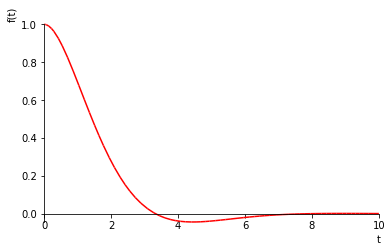

In [21]:
plot(re(non_unitary_psi(t)[0]), (t, 0, 10), line_color='r')

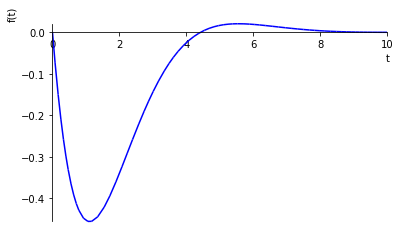

In [22]:
plot(im(non_unitary_psi(t)[1]), (t, 0, 10), line_color='b')

In [23]:
def lossy_norm(_t):
    psi = B(2*sqrt(2))(_t) * Matrix([1,0])
    return abs(psi[0])**2 + abs(psi[1])**2

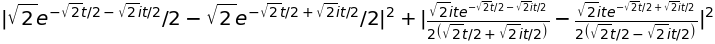

In [24]:
lossy_norm(t)

In [25]:
non_unitary_psi_n = lambdify(t, non_unitary_psi(t), "numpy")

In [26]:
lossy_norm_n = lambdify(t, lossy_norm(t), "numpy")

In [27]:
def non_unitary_psi_renorm_n(_t):
    return non_unitary_psi_n(_t) / np.sqrt(lossy_norm_n(_t))

In [28]:
T = np.linspace(1e-16, 10, 2000)

Text(0.5, 0, 't')

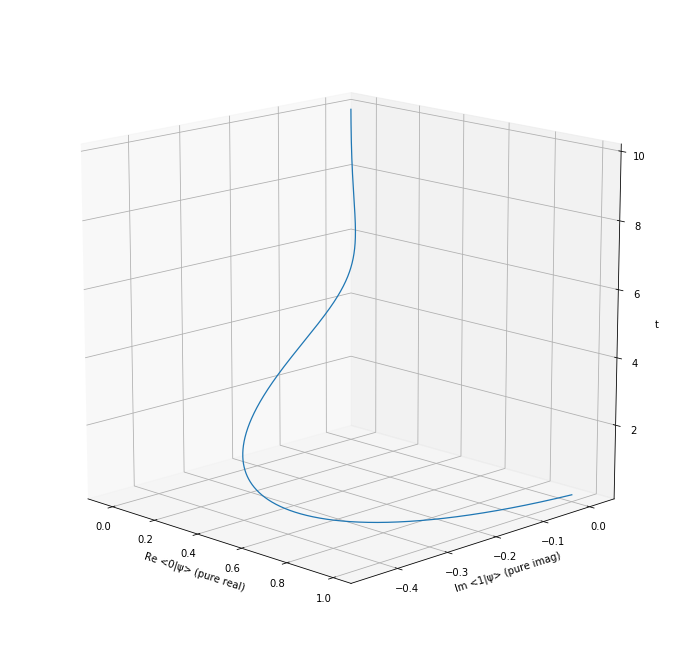

In [29]:
fig = plt.figure(figsize=(12,12))

ax = fig.gca(projection='3d')
ax.view_init(15,-45) # rotate 3d point of view

ax.plot(
    np.real(non_unitary_psi_n(T)[0][0]), np.imag(non_unitary_psi_n(T)[1][0]), T,
    linewidth=1.25
)

##ax.legend()

plt.xlabel('Re <0|\u03C8> (pure real)')
plt.ylabel('Im <1|\u03C8> (pure imag)')
ax.set_zlabel('t')


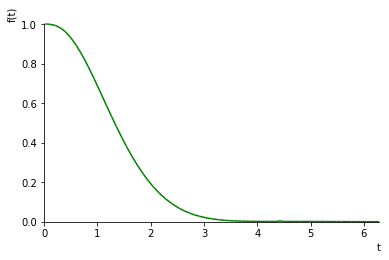

In [30]:
plot(lossy_norm(t),(t, 0, 2*pi), line_color='g')

In [31]:
def prob_0_detect(t):
    return abs(non_unitary_psi(t)[0]**2) / lossy_norm(t)

In [32]:
def prob_1_detect(t):
    return abs(non_unitary_psi(t)[1]**2) / lossy_norm(t)

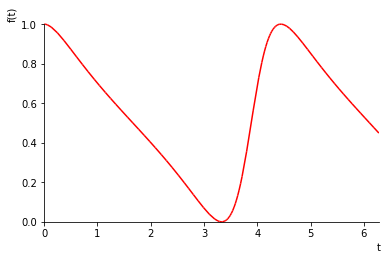

In [33]:
plot(prob_0_detect(t),(t, 0, 2*pi), line_color='r')

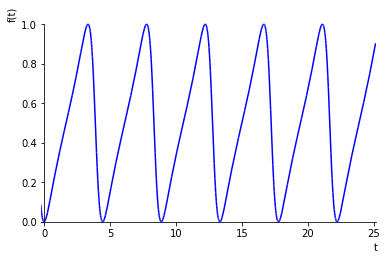

In [34]:
plot(prob_1_detect(t),(t, -0.25, 8*pi), line_color='b')

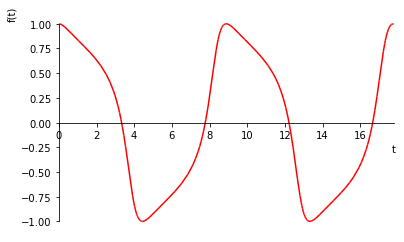

In [35]:
plot(re(non_unitary_psi(t)[0])/sqrt(lossy_norm(t)), (t, 0, 2 * 2*sqrt(2)*pi), line_color='r')

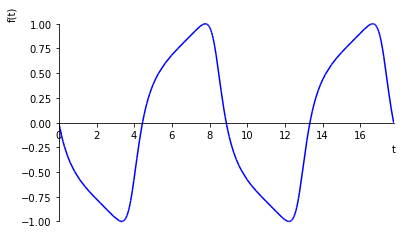

In [36]:
plot(im(non_unitary_psi(t)[1])/sqrt(lossy_norm(t)), (t, 0, 2 * 2*sqrt(2)*pi), line_color='b')

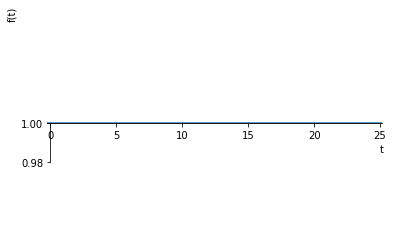

In [37]:
plot(prob_0_detect(t) + prob_1_detect(t),(t, -0.25, 8*pi))

In [38]:
#plot(log(abs(non_unitary_psi(t)[0]**2)), (t, -0.25, 8*pi), adaptive=False, nb_of_points=5000)

In [39]:
#plot(log(abs(non_unitary_psi(t)[1]**2)), (t, -0.25, 8*pi), adaptive=False, nb_of_points=5000)

In [40]:
def prob_0_unitary(t):
    return abs(unitary_psi(t)[0]**2)

In [41]:
def prob_1_unitary(t):
    return abs(unitary_psi(t)[1]**2)

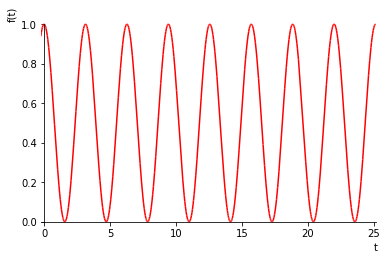

In [42]:
plot(prob_0_unitary(t),(t, -0.25, 8*pi), line_color='r')

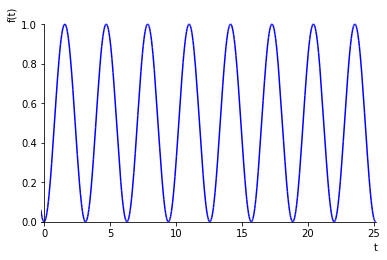

In [43]:
plot(prob_1_unitary(t),(t, -0.25, 8*pi), line_color='b')

In [44]:
lossy_norm_n(2)

In [45]:
X = np.linspace(1e-6, 8*np.pi, 5000)  # avoid singularity in t=0

In [46]:
Y = lossy_norm_n(X)

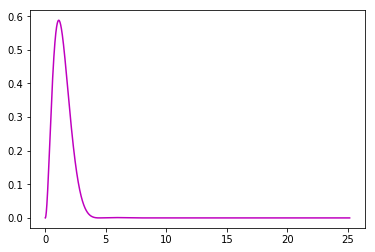

In [47]:
plt.plot(X, -np.gradient(Y, X), 'm')

In [48]:
# we have set gamma = 2*sqrt(2)
def hatpsi(_t):
    return \
        Heaviside(_t) * \
        2**(3/4) * \
        Matrix([
            [0, 0],
            [0, 1]
        ]) * \
        non_unitary_psi(_t)
        
        
    

In [49]:
def hatpsisquarednorm(_t):
    return abs(hatpsi(_t)[0]**2) + abs(hatpsi(_t)[1]**2)

In [50]:
hatpsisquarednorm(-1)

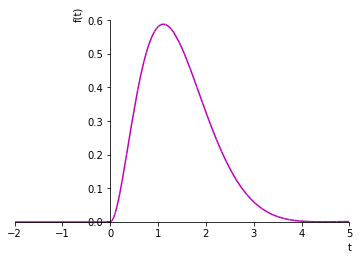

In [51]:
plot(hatpsisquarednorm(t), (t, -2, 5), line_color='m')

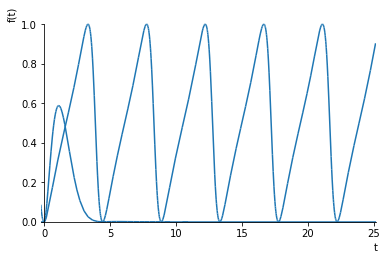

In [52]:
plot(prob_1_detect(t), hatpsisquarednorm(t), (t, -0.25, 8*pi))

In [53]:
def prob_0_hatpsi(_t):
    return abs(hatpsi(_t)[0]**2) / (abs(hatpsi(_t)[0]**2) + abs(hatpsi(_t)[1]**2))

In [54]:
def prob_1_hatpsi(_t):
    return abs(hatpsi(_t)[1]**2) / (abs(hatpsi(_t)[0]**2) + abs(hatpsi(_t)[1]**2))

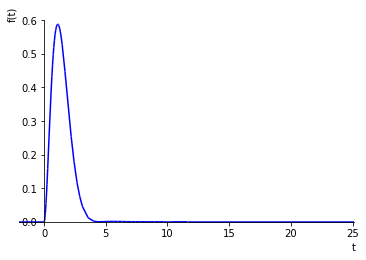

In [55]:
plot( abs(hatpsi(t)[1]**2), (t, -2, 8*pi), line_color='b')

In [56]:
im(hatpsi(t)[1])

In [57]:
def fhatpsi1(_omega):
    return fourier_transform(hatpsi(t)[1], t, _omega)

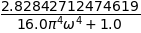

In [58]:
abs(fhatpsi1(omega))**2

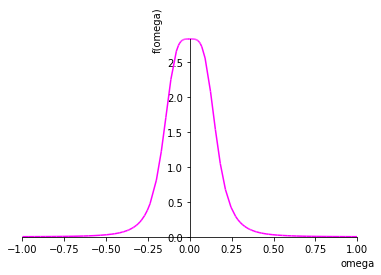

In [59]:
plot(abs(fhatpsi1(omega))**2, (omega, -1, 1), line_color='magenta')

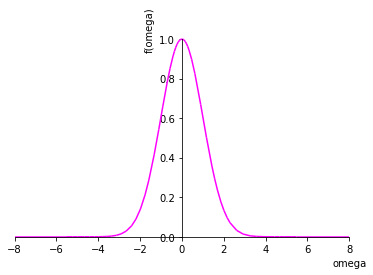

In [60]:
# compare with a gaussian
plot(
    exp(-(omega**2)/2), (omega, -8, 8), 
    line_color='magenta'
)

## (Discrete) Page-Wootters model

In [61]:
from scipy.linalg import dft

In [62]:
T = np.diag(np.arange(0,32)) * np.pi / 16

In [63]:
# The NumPy Fourier matrix is the conjugate of Mathematica's one,
# hence the trailing .conj() 
F = dft(32, scale='sqrtn').conj()

In [64]:
F_dagger = F.conj().T

In [65]:
Omega = F @ T @ F_dagger * 16 / np.pi

In [66]:
H = np.array([
    [0, 1],
    [1, 0]
])

In [67]:
D = np.array([
    [0, 0],
    [0, np.sqrt(2)]
])

In [68]:
K = H - 1j*D

In [69]:
K

array([[0.+0.j        , 1.+0.j        ],
       [1.+0.j        , 0.-1.41421356j]])

In [70]:
J = np.kron(Omega, np.eye(2)) + np.kron(np.eye(32), K)

In [71]:
eigenvalues, eigenvectors = np.linalg.eig(J)

In [72]:
EnergyCorrectionMatrices = np.zeros((64, 64, 64), np.complex)
for n in range(64):
    EnergyCorrectionMatrices[n] = np.kron(
        expm(-1j*eigenvalues[n]*T),
        np.eye(2)
    )

In [73]:
def history_vector(eigenindex):
    # Needs matrix transposition ".T" (different convention as opposed to Mathematica)
    eigenvector = eigenvectors.T[eigenindex]
    return EnergyCorrectionMatrices[eigenindex] @ eigenvector

def qubit_history(eigenindex):
    return np.reshape(history_vector(eigenindex), (-1,2))

In [74]:
# Find the best linear combination to obtain |0> as initial state
def find_best():
    max_prob0 = 0
    max_prob0_i = 0
    max_prob0_j = 0
    for i in range(32):
        for j in range(32):
            qbi = qubit_history(i)
            qbj = qubit_history(j)
            qbit_hist = qbi + qbj
            prob0 = np.abs(qbit_hist[0][0]**2) / (
                np.abs(qbit_hist[0][0]**2) + np.abs(qbit_hist[0][1]**2)
            )
            if prob0 > max_prob0:
                max_prob0 = prob0
                max_prob0_i = i
                max_prob0_j = j
    print (max_prob0_i, max_prob0_j, max_prob0)
    return (max_prob0_i, max_prob0_j)
    

In [75]:
# start with |0> as close as possible
i, j = find_best()
qbhist = qubit_history(i) + qubit_history(j) 

2 7 1.0


In [76]:
np.abs(qbhist[0][0]**2) / (np.abs(qbhist[0][0]**2) + np.abs(qbhist[0][1]**2)) 

In [77]:
# A phase factor to make it real
qbhist = qbhist * np.exp(-1j * np.angle(qbhist[0][0]))

In [78]:
# And a factor to normalize the initial state
qbhist = qbhist / sqrt(
    np.abs(qbhist[0][0]**2) + np.abs(qbhist[0][1]**2)
)

In [79]:
qbhist = qbhist.astype(complex)

Consitently with "odinary QM" findings, the component along |0> stays purely real, and the component along |1> stays purely imaginary.

In [80]:
# Fill data for plotting
times = np.arange(0, 2*np.pi, np.pi/16)
norms = np.zeros(32)
probs0 = np.zeros(32)
probs1 = np.zeros(32)
# Components 0 are pure real, componets 1 are pure imag
real_parts0 = np.real(qbhist.T[0])
imag_parts1 = np.imag(qbhist.T[1])

for i in range(0, 32):
    norms[i] = (np.abs(qbhist[i][0]**2) + np.abs(qbhist[i][1]**2))
    probs0[i] = np.abs(qbhist[i][0]**2) / (
        np.abs(qbhist[i][0]**2) + np.abs(qbhist[i][1]**2) )
    probs1[i] = np.abs(qbhist[i][1]**2) / (
        np.abs(qbhist[i][0]**2) + np.abs(qbhist[i][1]**2) )

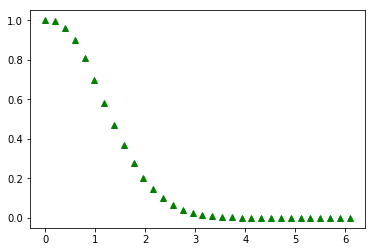

In [81]:
plt.plot(times, norms/norms[0], 'g^')

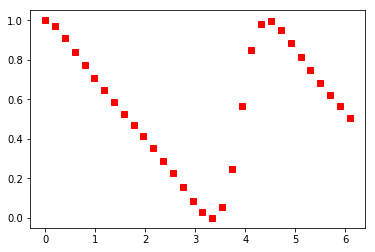

In [82]:
plt.plot(times, probs0, 'rs')

Text(0.5, 0, 't')

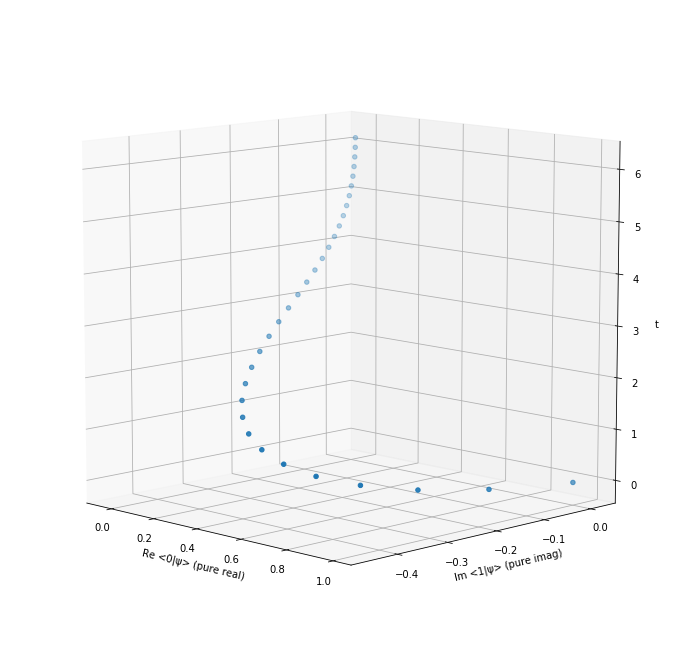

In [83]:
fig = plt.figure(figsize=(12,12))

#ax = fig.gca(projection='3d')
ax = fig.add_subplot(111, projection='3d')
ax.view_init(10,-45) # rotate 3d point of view

ax.scatter(
    real_parts0, imag_parts1, times
)

##ax.legend()

plt.xlabel('Re <0|\u03C8> (pure real)')
plt.ylabel('Im <1|\u03C8> (pure imag)')
ax.set_zlabel('t')


## Detection event

In [85]:
sqr2D = np.array([
    [0, 0],
    [0, 2**(5/4)]
])

### Check that "linear combinations of qubit histories" work as expected

In [87]:
qbhist1 = np.array([
    [0, 1],
    [2, 3]
])

In [88]:
qbhist2 = np.array([
    [4, 5],
    [6, 7]
])

In [89]:
qbhist1 + qbhist2

array([[ 4,  6],
       [ 8, 10]])